## Images and Logistic Regression

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.46MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.14MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.04MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
test_dataset = MNIST(root='data/', train=False)

In [5]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Label:  0


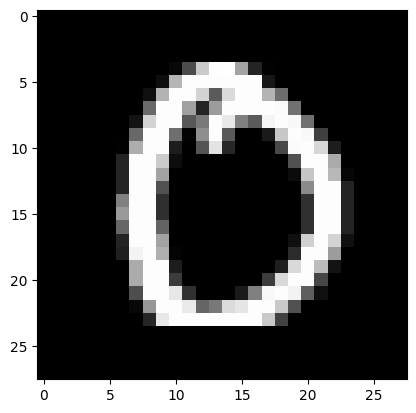

In [7]:
i = 88
image, label = dataset[i]
plt.imshow(image, cmap='gray')
print("Label: ", label)

In [8]:
dataset = MNIST(root = 'data/',
                train = True,
                transform = transforms.ToTensor())
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
i = 5
img_tensor, label = dataset[i]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 2


In [10]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.9882, 0.9882, 0.8627, 0.6549, 0.1176],
         [0.5020, 0.2275, 0.0863, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.4314, 0.4745],
         [0.0392, 0.2078, 0.7020, 0.9922, 0.9922]]])
tensor(1.) tensor(0.)


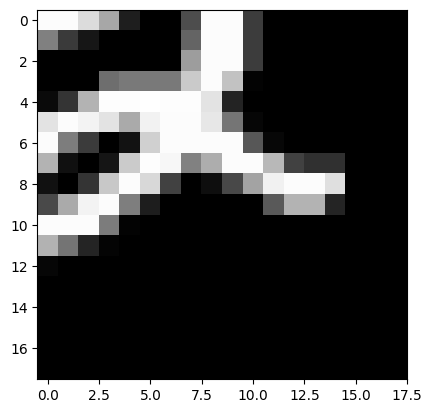

In [11]:
plt.imshow(img_tensor[0,10:,10:], cmap='grey')

In [12]:
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(train_ds, batch_size)

In [14]:
input_size = 28 * 28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape, model.bias.shape)
model.weight

torch.Size([10, 784]) torch.Size([10])


Parameter containing:
tensor([[-0.0043, -0.0186, -0.0274,  ..., -0.0225, -0.0224, -0.0165],
        [ 0.0063, -0.0178, -0.0310,  ..., -0.0086,  0.0010,  0.0126],
        [ 0.0078,  0.0146,  0.0339,  ...,  0.0140, -0.0299,  0.0248],
        ...,
        [-0.0320, -0.0063,  0.0134,  ..., -0.0261,  0.0096, -0.0302],
        [-0.0140, -0.0241, -0.0163,  ...,  0.0007, -0.0219, -0.0004],
        [ 0.0035,  0.0063, -0.0284,  ..., -0.0096,  0.0248,  0.0304]],
       requires_grad=True)

In [16]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([4, 3, 1, 7, 7, 7, 5, 0, 1, 7, 0, 9, 5, 4, 0, 2, 3, 9, 4, 8, 4, 4, 6, 2,
        2, 5, 2, 3, 9, 3, 0, 8, 9, 5, 3, 3, 0, 8, 3, 6, 4, 9, 5, 6, 3, 5, 3, 0,
        4, 1, 1, 7, 1, 0, 6, 4, 1, 5, 4, 2, 6, 4, 7, 8, 1, 1, 3, 2, 8, 4, 6, 7,
        3, 9, 7, 8, 6, 6, 6, 5, 6, 5, 0, 4, 1, 3, 5, 4, 5, 2, 2, 1, 3, 7, 3, 2,
        0, 5, 6, 9, 5, 7, 4, 2, 0, 6, 4, 0, 8, 4, 4, 7, 6, 4, 7, 0, 3, 6, 0, 1,
        0, 9, 6, 1, 6, 4, 3, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [17]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MNISTModel()

In [18]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0116,  0.0193, -0.0283,  ..., -0.0350, -0.0220,  0.0163],
         [ 0.0240,  0.0180,  0.0217,  ...,  0.0309,  0.0301, -0.0174],
         [ 0.0336,  0.0183,  0.0279,  ..., -0.0195,  0.0345, -0.0317],
         ...,
         [-0.0269, -0.0320,  0.0089,  ..., -0.0225,  0.0139, -0.0072],
         [ 0.0010,  0.0220,  0.0016,  ...,  0.0277,  0.0140,  0.0066],
         [ 0.0085,  0.0347, -0.0149,  ...,  0.0104,  0.0096, -0.0140]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0354, -0.0277, -0.0252, -0.0121,  0.0012, -0.0042,  0.0112,  0.0068,
         -0.0006, -0.0118], requires_grad=True)]

In [19]:
for images, labels in train_loader:
    outputs = model(images)
    break

print("outputs.shape : ", outputs.shape)
print("Sample Outputs :\n", outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample Outputs :
 tensor([[-0.0616, -0.1202,  0.1929, -0.2935, -0.1300, -0.0641, -0.0405,  0.0939,
          0.0587,  0.2571],
        [ 0.1565, -0.1169, -0.0262, -0.3761, -0.2992,  0.0848, -0.0832, -0.1792,
          0.0589,  0.0364]])


In [20]:
outputs[0]

tensor([-0.0616, -0.1202,  0.1929, -0.2935, -0.1300, -0.0641, -0.0405,  0.0939,
         0.0587,  0.2571], grad_fn=<SelectBackward0>)

In [21]:
exps = torch.exp(outputs[0])
exps

tensor([0.9402, 0.8868, 1.2128, 0.7456, 0.8781, 0.9379, 0.9603, 1.0984, 1.0605,
        1.2932], grad_fn=<ExpBackward0>)

In [22]:
probs = exps/torch.sum(exps)
probs

tensor([0.0939, 0.0886, 0.1211, 0.0745, 0.0877, 0.0937, 0.0959, 0.1097, 0.1059,
        0.1291], grad_fn=<DivBackward0>)

In [23]:
torch.sum(probs)

tensor(1.0000, grad_fn=<SumBackward0>)

In [24]:
probs = F.softmax(outputs,dim=1)

print("Sample Probabilities:\n", probs[0:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0939, 0.0886, 0.1211, 0.0745, 0.0877, 0.0937, 0.0959, 0.1097, 0.1059,
         0.1291],
        [0.1244, 0.0946, 0.1036, 0.0730, 0.0788, 0.1157, 0.0979, 0.0889, 0.1128,
         0.1103]])
Sum:  1.0


In [25]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs, '\n',preds)

tensor([0.1291, 0.1244, 0.1521, 0.1164, 0.1302, 0.1394, 0.1477, 0.1354, 0.1215,
        0.1380, 0.1435, 0.1162, 0.1175, 0.1337, 0.1344, 0.1267, 0.1260, 0.1261,
        0.1215, 0.1168, 0.1376, 0.1316, 0.1155, 0.1275, 0.1371, 0.1426, 0.1219,
        0.1236, 0.1517, 0.1343, 0.1159, 0.1180, 0.1175, 0.1176, 0.1280, 0.1236,
        0.1381, 0.1348, 0.1192, 0.1656, 0.1208, 0.1168, 0.1396, 0.1131, 0.1417,
        0.1140, 0.1528, 0.1217, 0.1198, 0.1215, 0.1333, 0.1243, 0.1149, 0.1231,
        0.1208, 0.1150, 0.1208, 0.1334, 0.1279, 0.1193, 0.1172, 0.1251, 0.1340,
        0.1174, 0.1353, 0.1176, 0.1485, 0.1227, 0.1230, 0.1232, 0.1471, 0.1101,
        0.1189, 0.1348, 0.1196, 0.1287, 0.1317, 0.1149, 0.1335, 0.1166, 0.1105,
        0.1145, 0.1308, 0.1361, 0.1220, 0.1372, 0.1348, 0.1291, 0.1399, 0.1184,
        0.1246, 0.1234, 0.1182, 0.1267, 0.1165, 0.1422, 0.1350, 0.1186, 0.1191,
        0.1263, 0.1590, 0.1268, 0.1221, 0.1308, 0.1411, 0.1366, 0.1329, 0.1226,
        0.1266, 0.1483, 0.1275, 0.1191, 

In [26]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return 100 * torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [27]:
accuracy(outputs, labels)

tensor(6.2500)

In [28]:
loss_fn = F.cross_entropy

In [29]:
loss = loss_fn(outputs, labels)
loss

tensor(2.2833, grad_fn=<NllLossBackward0>)

In [30]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    return self.linear(xb)

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [31]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [32]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [33]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.305098295211792, 'val_acc': 11.669198036193848}

In [35]:
history1 = fit(5, 0.001,model, train_loader, val_loader)

Epoch [0], val_loss: 1.9400, val_acc: 59.8074
Epoch [1], val_loss: 1.6724, val_acc: 71.8346
Epoch [2], val_loss: 1.4725, val_acc: 75.7365
Epoch [3], val_loss: 1.3215, val_acc: 77.8485
Epoch [4], val_loss: 1.2055, val_acc: 79.2767


In [36]:
history2 = fit(5, 0.001,model, train_loader, val_loader)
history3 = fit(5, 0.001,model, train_loader, val_loader)
history4 = fit(5, 0.001,model, train_loader, val_loader)

Epoch [0], val_loss: 1.1143, val_acc: 80.3788
Epoch [1], val_loss: 1.0413, val_acc: 81.1765
Epoch [2], val_loss: 0.9815, val_acc: 81.8191
Epoch [3], val_loss: 0.9317, val_acc: 82.3965
Epoch [4], val_loss: 0.8896, val_acc: 82.8852
Epoch [0], val_loss: 0.8536, val_acc: 83.2409
Epoch [1], val_loss: 0.8224, val_acc: 83.5798
Epoch [2], val_loss: 0.7950, val_acc: 83.8363
Epoch [3], val_loss: 0.7709, val_acc: 84.0601
Epoch [4], val_loss: 0.7494, val_acc: 84.2939
Epoch [0], val_loss: 0.7301, val_acc: 84.5257
Epoch [1], val_loss: 0.7127, val_acc: 84.7614
Epoch [2], val_loss: 0.6969, val_acc: 84.9413
Epoch [3], val_loss: 0.6824, val_acc: 85.1742
Epoch [4], val_loss: 0.6692, val_acc: 85.3141


Text(0.5, 1.0, 'Accuracy v/s Number of Epochs')

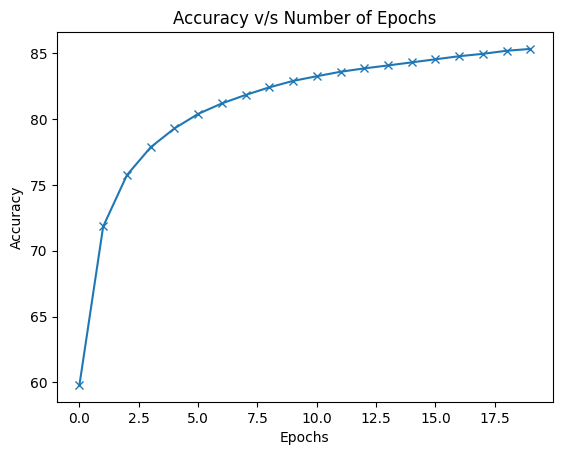

In [38]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy v/s Number of Epochs")

In [45]:
dataset = MNIST(root='/data', train=False, download=True)

In [66]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
])

def predict_image(img, model):
  img = transform(img)
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb,dim=1)
  return preds[0].item()




Label:  9  Predicted  9


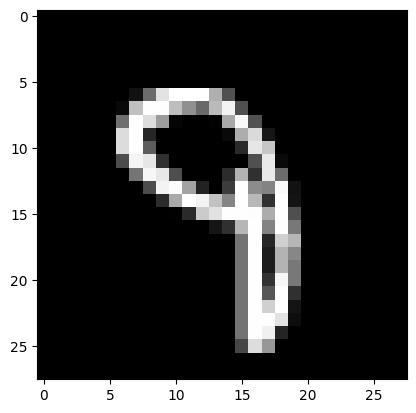

In [69]:
i = 193
img, label = dataset[i]
plt.imshow(img, cmap='gray')
print('Label: ', label, " Predicted ",predict_image(img, model))
for i in range(len(dataset)):



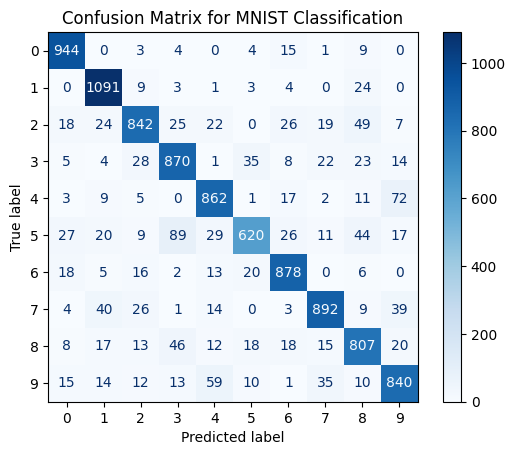

In [78]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the following are predefined:
# model: your trained PyTorch model
# test_loader: DataLoader for the MNIST test dataset
# device: torch device (e.g., "cuda" if GPU is available, otherwise "cpu")

def get_predictions_and_labels(model, loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in loader:
            # print(type(images))
            images = transform(images)
            outputs = model(images)  # Get model predictions
            _, preds = torch.max(outputs, dim=1)  # Get predicted classes
            all_preds.extend(preds.numpy())  # Append predictions
        all_labels = [labels for _, labels in dataset]
    return all_preds, all_labels

# Get predictions and true labels
preds, labels = get_predictions_and_labels(model, dataset)

# Generate the confusion matrix
cm = confusion_matrix(labels, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST Classification")
plt.show()


In [79]:
from sklearn.metrics import classification_report
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.89      0.96      0.92      1135
           2       0.87      0.82      0.84      1032
           3       0.83      0.86      0.84      1010
           4       0.85      0.88      0.86       982
           5       0.87      0.70      0.77       892
           6       0.88      0.92      0.90       958
           7       0.89      0.87      0.88      1028
           8       0.81      0.83      0.82       974
           9       0.83      0.83      0.83      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

